In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from IPython.display import Markdown, display
from scipy.stats import shapiro, norm


In [13]:
def markdown(input):
    display(Markdown(input))

In [14]:
data_path = "../data/anggur.csv"
df = pd.read_csv(data_path)
df.columns = ["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide", 
              "total_sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.90,0.4451,0.1813,2.049401,0.070574,16.593818,42.27,0.9982,3.27,0.71,8.64,7
1,8.40,0.5768,0.2099,3.109590,0.101681,22.555519,16.01,0.9960,3.35,0.57,10.03,8
2,7.54,0.5918,0.3248,3.673744,0.072416,9.316866,35.52,0.9990,3.31,0.64,9.23,8
3,5.39,0.4201,0.3131,3.371815,0.072755,18.212300,41.97,0.9945,3.34,0.55,14.07,9
4,6.51,0.5675,0.1940,4.404723,0.066379,9.360591,46.27,0.9925,3.27,0.45,11.49,8
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.96,0.6046,0.2662,1.592048,0.057555,14.892445,44.61,0.9975,3.35,0.54,10.41,8
996,8.48,0.4080,0.2227,0.681955,0.051627,23.548965,25.83,0.9972,3.41,0.46,9.91,8
997,6.11,0.4841,0.3720,2.377267,0.042806,21.624585,48.75,0.9928,3.23,0.55,9.94,7
998,7.76,0.3590,0.3208,4.294486,0.098276,12.746186,44.53,0.9952,3.30,0.66,9.76,8


##### Nomor 1
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat
numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum,
maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

In [15]:
from tabulate import tabulate
stat = {}
def describe(column_name): 
    temp = {}
    df1 = df[column_name]
    temp["Mean"] = df1.mean()
    temp["Median"] = df1.median()
    temp["Mode"] = df1.mode()[0]
    temp["Deviation"] = df1.std()
    temp["Variation"] = df1.var()
    temp["Range"] = df1.max() - df1.min()
    temp["Min"] = df1.min()
    temp["Max"] = df1.max()
    temp["1st Quartile"] = df1.quantile(0.25)
    temp["2nd Quartile"] = df1.quantile(0.5)
    temp["3rd Quartile"] = df1.quantile(0.75)
    temp["IQR"] = df1.quantile(0.75) - df1.quantile(0.25)  
    temp["Skew"] = df1.skew()
    temp["Kurtosis"] = df1.kurtosis()
    stat[column_name] = temp
    print(tabulate([k, v] for k, v in temp.items()))

    

In [16]:
for column in list(df) :
    markdown(f"#### {column}")
    describe(column) 

#### fixed_acidity

------------  ----------
Mean           7.15253
Median         7.15
Mode           6.54
Deviation      1.2016
Variation      1.44384
Range          8.17
Min            3.32
Max           11.49
1st Quartile   6.3775
2nd Quartile   7.15
3rd Quartile   8
IQR            1.6225
Skew          -0.0288786
Kurtosis      -0.0192921
------------  ----------


#### volatile_acidity

------------  -----------
Mean           0.520839
Median         0.52485
Mode           0.5546
Deviation      0.0958483
Variation      0.00918689
Range          0.6652
Min            0.1399
Max            0.8051
1st Quartile   0.4561
2nd Quartile   0.52485
3rd Quartile   0.585375
IQR            0.129275
Skew          -0.197699
Kurtosis       0.161853
------------  -----------


#### citric_acid

------------  -----------
Mean           0.270517
Median         0.2722
Mode           0.3019
Deviation      0.0490984
Variation      0.00241065
Range          0.2929
Min            0.1167
Max            0.4096
1st Quartile   0.2378
2nd Quartile   0.2722
3rd Quartile   0.302325
IQR            0.064525
Skew          -0.0455761
Kurtosis      -0.104679
------------  -----------


#### residual_sugar

------------  ----------
Mean           2.5671
Median         2.51943
Mode           0.0325545
Deviation      0.987915
Variation      0.975977
Range          5.5182
Min            0.0325545
Max            5.55075
1st Quartile   1.89633
2nd Quartile   2.51943
3rd Quartile   3.22087
IQR            1.32454
Skew           0.132638
Kurtosis      -0.04298
------------  ----------


#### chlorides

------------  ------------
Mean           0.0811952
Median         0.0821669
Mode           0.0151224
Deviation      0.0201106
Variation      0.000404438
Range          0.125635
Min            0.0151224
Max            0.140758
1st Quartile   0.0665736
2nd Quartile   0.0821669
3rd Quartile   0.0953115
IQR            0.0287379
Skew          -0.0513193
Kurtosis      -0.246508
------------  ------------


#### free_sulfur_dioxide

------------  -----------
Mean          14.9077
Median        14.8603
Mode           0.194679
Deviation      4.8881
Variation     23.8935
Range         27.2678
Min            0.194679
Max           27.4625
1st Quartile  11.4267
2nd Quartile  14.8603
3rd Quartile  18.3131
IQR            6.88638
Skew           0.00713042
Kurtosis      -0.364964
------------  -----------


#### total_sulfur dioxide

------------  ----------
Mean          40.2902
Median        40.19
Mode          35.2
Deviation      9.96577
Variation     99.3165
Range         66.81
Min            3.15
Max           69.96
1st Quartile  33.785
2nd Quartile  40.19
3rd Quartile  47.0225
IQR           13.2375
Skew          -0.02406
Kurtosis       0.0639498
------------  ----------


#### density

------------  ------------
Mean           0.995925
Median         0.996
Mode           0.9959
Deviation      0.00202018
Variation      4.08113e-06
Range          0.0138
Min            0.9888
Max            1.0026
1st Quartile   0.9946
2nd Quartile   0.996
3rd Quartile   0.9972
IQR            0.0026
Skew          -0.0768828
Kurtosis       0.0163656
------------  ------------


#### pH

------------  ---------
Mean          3.30361
Median        3.3
Mode          3.34
Deviation     0.104875
Variation     0.0109989
Range         0.74
Min           2.97
Max           3.71
1st Quartile  3.23
2nd Quartile  3.3
3rd Quartile  3.37
IQR           0.14
Skew          0.147673
Kurtosis      0.0809096
------------  ---------


#### sulphates

------------  ---------
Mean          0.59839
Median        0.595
Mode          0.59
Deviation     0.100819
Variation     0.0101645
Range         0.67
Min           0.29
Max           0.96
1st Quartile  0.53
2nd Quartile  0.595
3rd Quartile  0.67
IQR           0.14
Skew          0.149199
Kurtosis      0.0648193
------------  ---------


#### alcohol

------------  ----------
Mean          10.5923
Median        10.61
Mode           9.86
Deviation      1.51071
Variation      2.28223
Range          8.99
Min            6.03
Max           15.02
1st Quartile   9.56
2nd Quartile  10.61
3rd Quartile  11.6225
IQR            2.0625
Skew          -0.0189914
Kurtosis      -0.131732
------------  ----------


#### quality

------------  ----------
Mean           7.958
Median         8
Mode           8
Deviation      0.902802
Variation      0.815051
Range          5
Min            5
Max           10
1st Quartile   7
2nd Quartile   8
3rd Quartile   9
IQR            2
Skew          -0.0890541
Kurtosis       0.108291
------------  ----------


##### Nomor 2
Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot
tersebut.

In [17]:
def show_plot(column_name):
    global stat
    df1 = df[column_name]
    
    plt.subplot(1,2,1)
    df1.plot(kind="hist",figsize=(10,4), color = "skyblue")
    plt.xlabel("Value")
    plt.title('Histogram')
    plt.grid()

    plt.subplot(1,2,2)
    df1.plot(kind = "box", vert=False)
    plt.title('Boxplot')
    plt.yticks(ticks=[0]) 
    plt.xlabel("Value")
    plt.grid()
    plt.tight_layout()
    
    skew = round(stat[column_name]["Skew"], 3)
    kurtosis = round(stat[column_name]["Skew"], 3)
    plt.annotate(f"Skew = {skew} Kurotsis = {kurtosis}", 
                 xy = (-0.25, -0.2),
                xycoords='axes fraction')
    plt.show()

def explain_plot(column_name):
    global stat
    
    skew = stat[column_name]["Skew"]
    explanation = "Pada histogram, terlihat distribusi data" 
    if (skew == 0) :
        explanation += " terpusat ditengah atau ***perfectly symmetric***." 
        explanation += " Pada boxplot juga terlihat nilai median berada tepat ditengah *interquartile range* yang menandakan bahwa distribusi data tepat simetris." 
        explanation += " Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = 0."
    elif (abs(skew) < 0.5) : 
        explanation += " relatif terpusat ditengah atau ***approximately symmetric***"
        explanation += " Pada boxplot juga terlihat nilai median berada relatif ditengah *interquartile range* yang menandakan bahwa distribusi data relatif simetris." 
        explanation += f" Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = {round(skew, 3)} berada diantara -0.5 hingga 0.5."
    elif (skew < -0.5) : 
        explanation += "cenderung ke kanan atau ***positively skewed***"
        explanation += " Pada boxplot juga terlihat nilai median berada di kanan *interquartile range* yang menandakan bahwa distribusi data cenderung ke kiri." 
        explanation += f" Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = {round(skew, 3)} < -0.5."
    else : 
        explanation += "cenderung ke kiri atau ***negatively skewed***"
        explanation += " Pada boxplot juga terlihat nilai median berada di kiri *interquartile range* yang menandakan bahwa distribusi data cenderung ke kanan." 
        explanation += f" Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = {round(skew, 3)} > 0.5."
    
    markdown(explanation)
    
    kurtosis = stat[column_name]["Kurtosis"]
    explanation = "Pada histrogram, dapat dilihat pula *peakedness* dari distribusi tersebut"
    if (kurtosis == 0) :
        explanation += " serupa dengan distribusi normal atau ***mesokurtic***."
        explanation += f" Hal ini dapat terkonfirmasi oleh nilai *kurtosis* = {round(kurtosis, 3)} = 0."
    elif (kurtosis > 0 ):
        explanation += " lebih dari distribusi normal atau ***leptokurtic***."
        explanation += f" Hal ini dapat terkonfirmasi oleh nilai *kurtosis* = {round(kurtosis, 3)} > 0."
    else : 
        explanation += " kurang dari distribusi normal atau ***platykurtic***."
        explanation += f" Hal ini dapat terkonfirmasi oleh nilai *kurtosis* = {round(kurtosis, 3)} < 0."
    
    markdown(explanation)
    
    

#### fixed_acidity

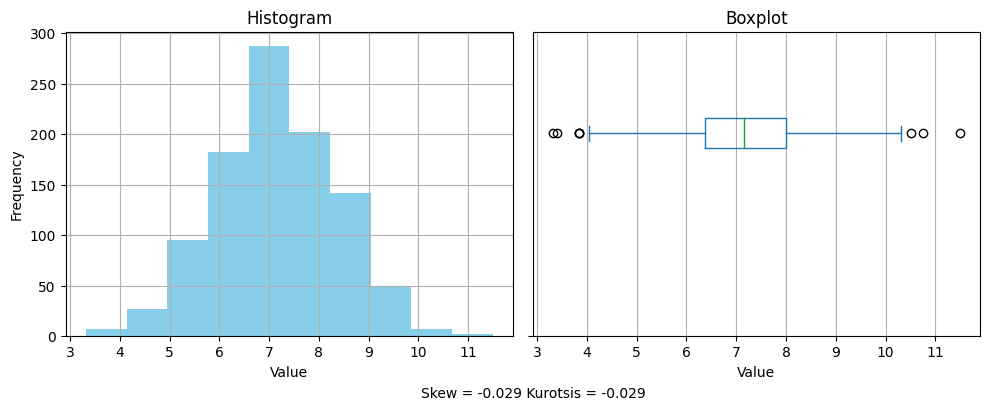

Pada histogram, terlihat distribusi data relatif terpusat ditengah atau ***approximately symmetric*** Pada boxplot juga terlihat nilai median berada relatif ditengah *interquartile range* yang menandakan bahwa distribusi data relatif simetris. Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = -0.029 berada diantara -0.5 hingga 0.5.

Pada histrogram, dapat dilihat pula *peakedness* dari distribusi tersebut kurang dari distribusi normal atau ***platykurtic***. Hal ini dapat terkonfirmasi oleh nilai *kurtosis* = -0.019 < 0.

#### volatile_acidity

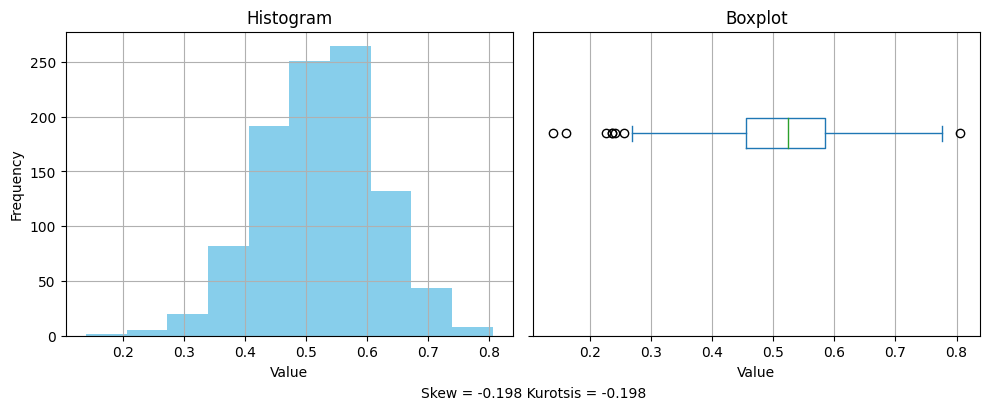

Pada histogram, terlihat distribusi data relatif terpusat ditengah atau ***approximately symmetric*** Pada boxplot juga terlihat nilai median berada relatif ditengah *interquartile range* yang menandakan bahwa distribusi data relatif simetris. Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = -0.198 berada diantara -0.5 hingga 0.5.

Pada histrogram, dapat dilihat pula *peakedness* dari distribusi tersebut lebih dari distribusi normal atau ***leptokurtic***. Hal ini dapat terkonfirmasi oleh nilai *kurtosis* = 0.162 > 0.

#### citric_acid

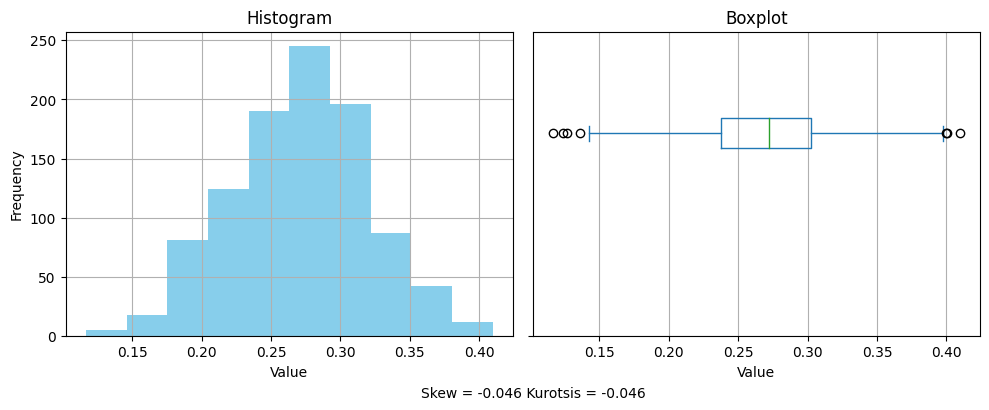

Pada histogram, terlihat distribusi data relatif terpusat ditengah atau ***approximately symmetric*** Pada boxplot juga terlihat nilai median berada relatif ditengah *interquartile range* yang menandakan bahwa distribusi data relatif simetris. Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = -0.046 berada diantara -0.5 hingga 0.5.

Pada histrogram, dapat dilihat pula *peakedness* dari distribusi tersebut kurang dari distribusi normal atau ***platykurtic***. Hal ini dapat terkonfirmasi oleh nilai *kurtosis* = -0.105 < 0.

#### residual_sugar

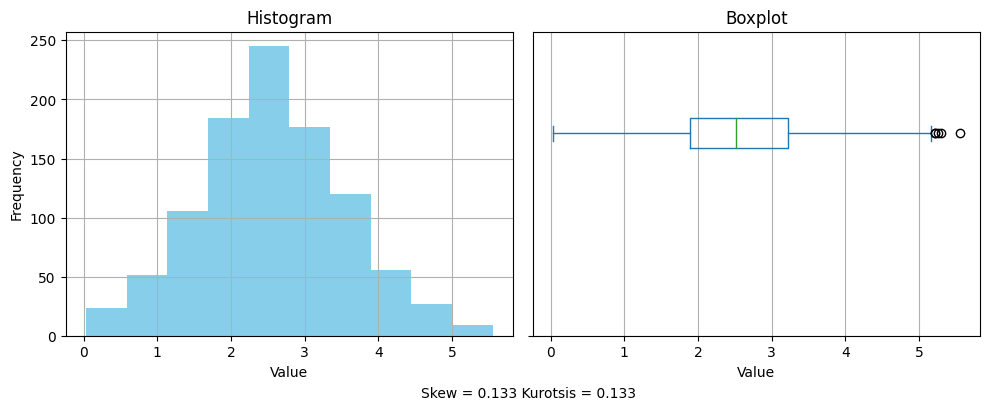

Pada histogram, terlihat distribusi data relatif terpusat ditengah atau ***approximately symmetric*** Pada boxplot juga terlihat nilai median berada relatif ditengah *interquartile range* yang menandakan bahwa distribusi data relatif simetris. Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = 0.133 berada diantara -0.5 hingga 0.5.

Pada histrogram, dapat dilihat pula *peakedness* dari distribusi tersebut kurang dari distribusi normal atau ***platykurtic***. Hal ini dapat terkonfirmasi oleh nilai *kurtosis* = -0.043 < 0.

#### chlorides

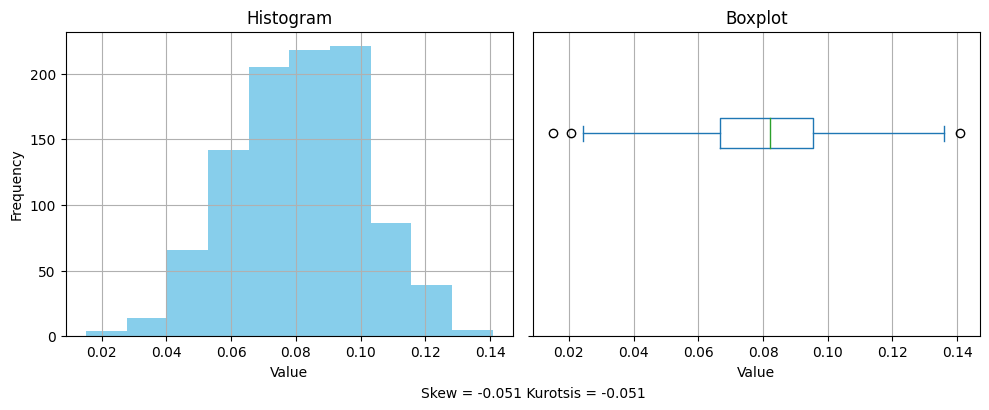

Pada histogram, terlihat distribusi data relatif terpusat ditengah atau ***approximately symmetric*** Pada boxplot juga terlihat nilai median berada relatif ditengah *interquartile range* yang menandakan bahwa distribusi data relatif simetris. Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = -0.051 berada diantara -0.5 hingga 0.5.

Pada histrogram, dapat dilihat pula *peakedness* dari distribusi tersebut kurang dari distribusi normal atau ***platykurtic***. Hal ini dapat terkonfirmasi oleh nilai *kurtosis* = -0.247 < 0.

#### free_sulfur_dioxide

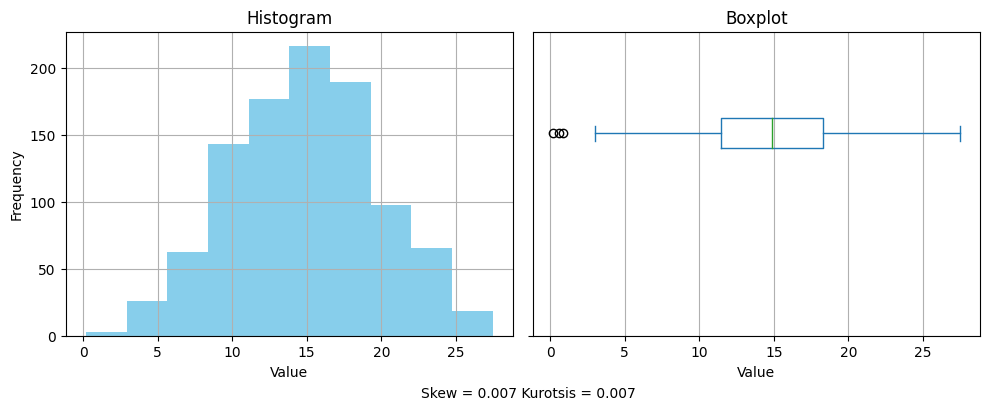

Pada histogram, terlihat distribusi data relatif terpusat ditengah atau ***approximately symmetric*** Pada boxplot juga terlihat nilai median berada relatif ditengah *interquartile range* yang menandakan bahwa distribusi data relatif simetris. Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = 0.007 berada diantara -0.5 hingga 0.5.

Pada histrogram, dapat dilihat pula *peakedness* dari distribusi tersebut kurang dari distribusi normal atau ***platykurtic***. Hal ini dapat terkonfirmasi oleh nilai *kurtosis* = -0.365 < 0.

#### total_sulfur dioxide

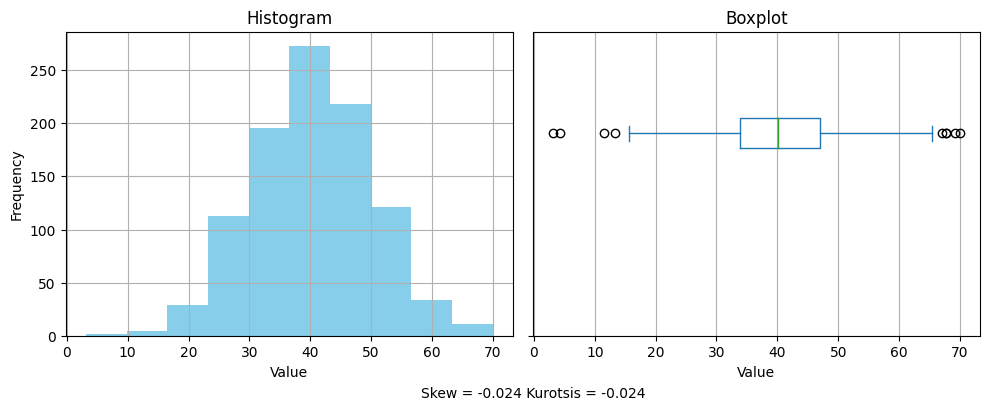

Pada histogram, terlihat distribusi data relatif terpusat ditengah atau ***approximately symmetric*** Pada boxplot juga terlihat nilai median berada relatif ditengah *interquartile range* yang menandakan bahwa distribusi data relatif simetris. Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = -0.024 berada diantara -0.5 hingga 0.5.

Pada histrogram, dapat dilihat pula *peakedness* dari distribusi tersebut lebih dari distribusi normal atau ***leptokurtic***. Hal ini dapat terkonfirmasi oleh nilai *kurtosis* = 0.064 > 0.

#### density

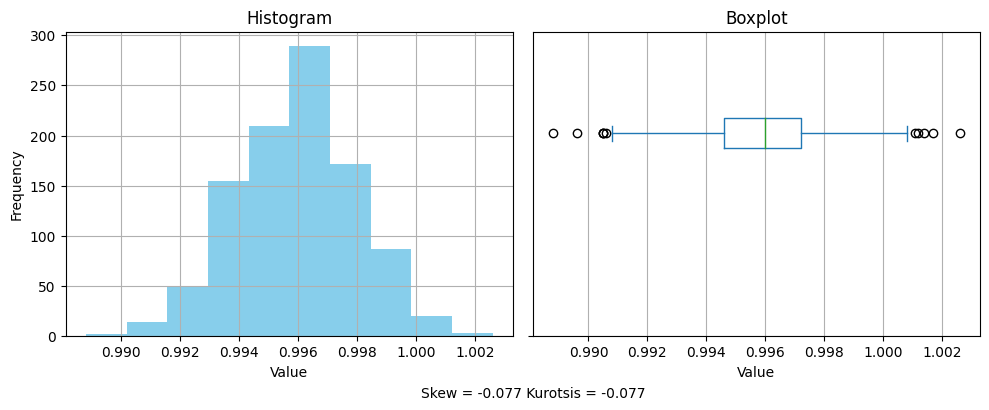

Pada histogram, terlihat distribusi data relatif terpusat ditengah atau ***approximately symmetric*** Pada boxplot juga terlihat nilai median berada relatif ditengah *interquartile range* yang menandakan bahwa distribusi data relatif simetris. Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = -0.077 berada diantara -0.5 hingga 0.5.

Pada histrogram, dapat dilihat pula *peakedness* dari distribusi tersebut lebih dari distribusi normal atau ***leptokurtic***. Hal ini dapat terkonfirmasi oleh nilai *kurtosis* = 0.016 > 0.

#### pH

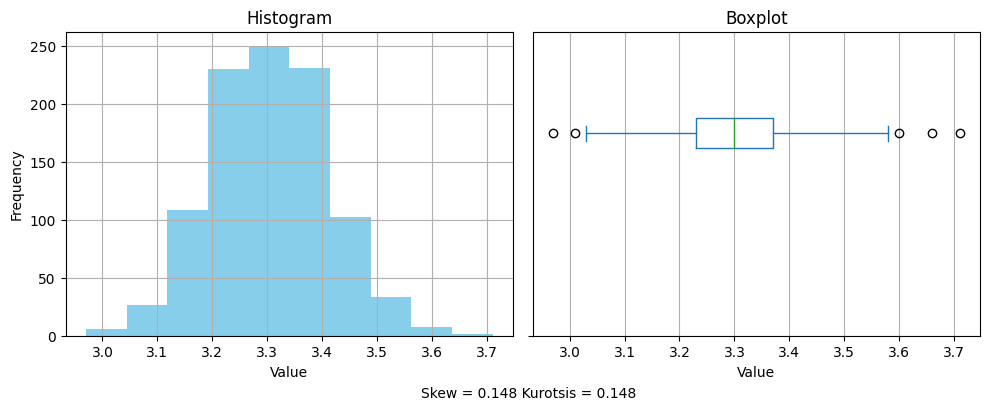

Pada histogram, terlihat distribusi data relatif terpusat ditengah atau ***approximately symmetric*** Pada boxplot juga terlihat nilai median berada relatif ditengah *interquartile range* yang menandakan bahwa distribusi data relatif simetris. Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = 0.148 berada diantara -0.5 hingga 0.5.

Pada histrogram, dapat dilihat pula *peakedness* dari distribusi tersebut lebih dari distribusi normal atau ***leptokurtic***. Hal ini dapat terkonfirmasi oleh nilai *kurtosis* = 0.081 > 0.

#### sulphates

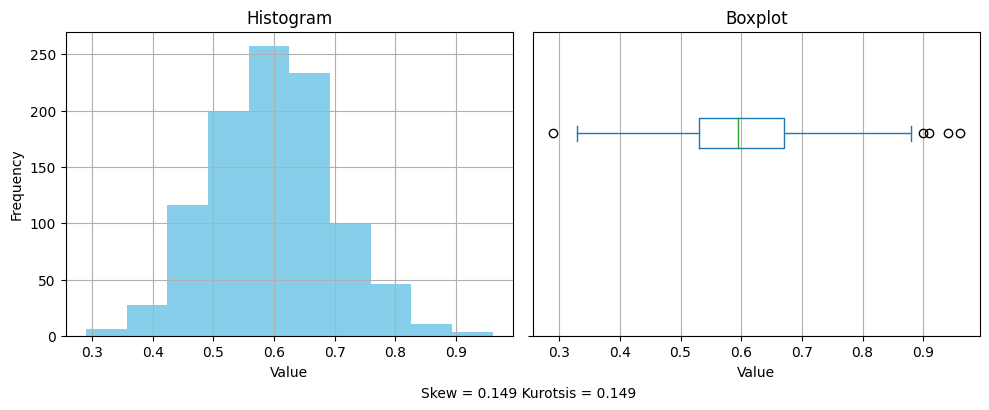

Pada histogram, terlihat distribusi data relatif terpusat ditengah atau ***approximately symmetric*** Pada boxplot juga terlihat nilai median berada relatif ditengah *interquartile range* yang menandakan bahwa distribusi data relatif simetris. Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = 0.149 berada diantara -0.5 hingga 0.5.

Pada histrogram, dapat dilihat pula *peakedness* dari distribusi tersebut lebih dari distribusi normal atau ***leptokurtic***. Hal ini dapat terkonfirmasi oleh nilai *kurtosis* = 0.065 > 0.

#### alcohol

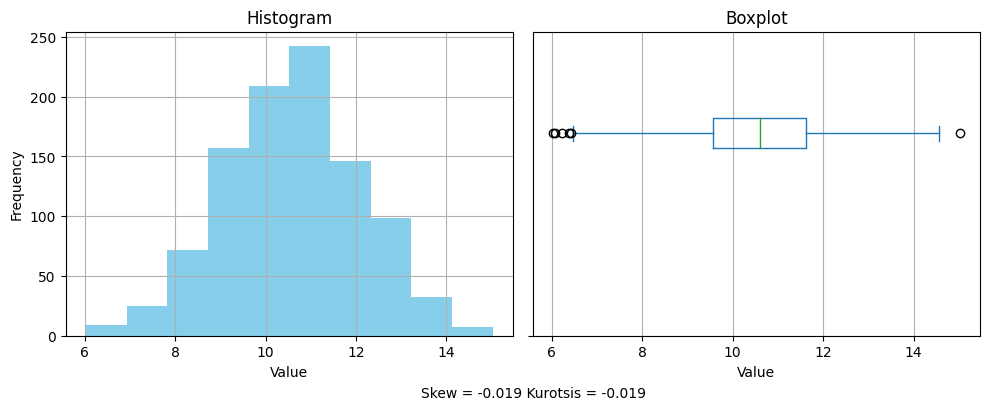

Pada histogram, terlihat distribusi data relatif terpusat ditengah atau ***approximately symmetric*** Pada boxplot juga terlihat nilai median berada relatif ditengah *interquartile range* yang menandakan bahwa distribusi data relatif simetris. Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = -0.019 berada diantara -0.5 hingga 0.5.

Pada histrogram, dapat dilihat pula *peakedness* dari distribusi tersebut kurang dari distribusi normal atau ***platykurtic***. Hal ini dapat terkonfirmasi oleh nilai *kurtosis* = -0.132 < 0.

#### quality

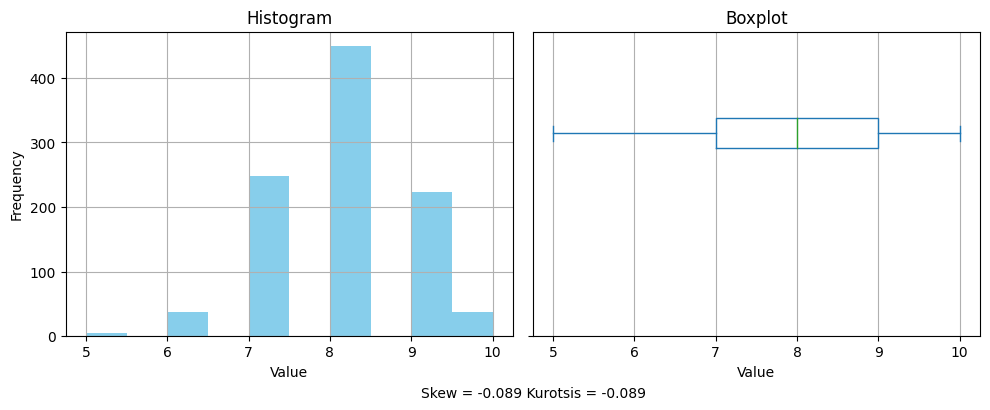

Pada histogram, terlihat distribusi data relatif terpusat ditengah atau ***approximately symmetric*** Pada boxplot juga terlihat nilai median berada relatif ditengah *interquartile range* yang menandakan bahwa distribusi data relatif simetris. Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = -0.089 berada diantara -0.5 hingga 0.5.

Pada histrogram, dapat dilihat pula *peakedness* dari distribusi tersebut lebih dari distribusi normal atau ***leptokurtic***. Hal ini dapat terkonfirmasi oleh nilai *kurtosis* = 0.108 > 0.

In [18]:
for column_name in list(df):
    markdown(f"#### {column_name}")
    show_plot(column_name)
    explain_plot(column_name)
    print("\n\n")

#### Nomor 3 
Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test
yang dikaitkan dengan histogram plot.

In [19]:
def show_histplot(column_name) :
    df1 = df[column_name]
    sns.histplot(df1, kde=True, stat="density", linewidth=1)
    
    stat, p_value = shapiro(df1)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    mu, std = norm.fit(df1) 
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, linewidth=1, color='red')
    
    plt.annotate(f"P-Value = {p_value}", 
                xy = (0.25, -0.2),
                xycoords='axes fraction')

#### fixed_acidity

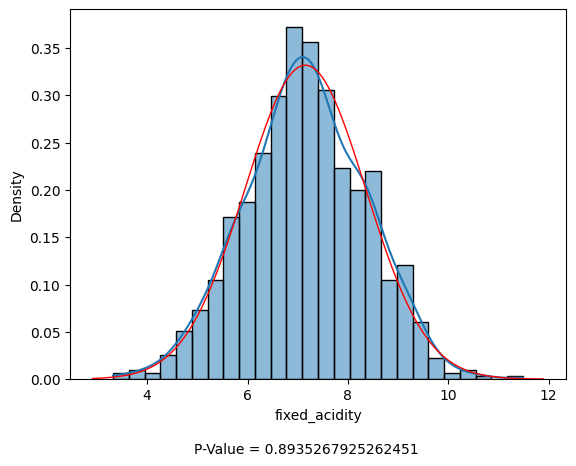

In [20]:
markdown("#### " + list(df)[0])
show_histplot(list(df)[0])

Pada kurva/plot histogram, terlihat bahwa: 
+ kurva relatif simetrik
+ hanya ada satu peak pada kurva/ kurva bersifat unimodal
+ kurva relatif melandai dengan mulus tanpa ada *peak* 
+ kurva relatif menyerupai *bells curve* referensi (garis merah) 

Keempat deskripsi tersebut mengindikasikan kurva normal maka berdasarkan visualisasi histogram dapat disimpulkan bahwa data pada kolom fixed acidity **terdistribusi secara normal**.

Selanjutnya, dengan  *Shapiro-Wilk test* akan diuji apakah kurva tersebut merupakan kurva normal atau bukan. Berdasarkan *Shapiro-Wilk test* diperoleh nilai p-value sebesar 0.893 yang lebih besar dari *threshold* yaitu 0.05. Maka berdasarkan *Shapiro-Wilk test* **tidak dapat dibuktikan** bahwa kurva tersebut **tidak** terdistribusi secara normal. Hal ini mendukung pernyataan kesimpulan sebelumnya bahwa data pada kolom fixed acidity **terdistribusi secara normal**.

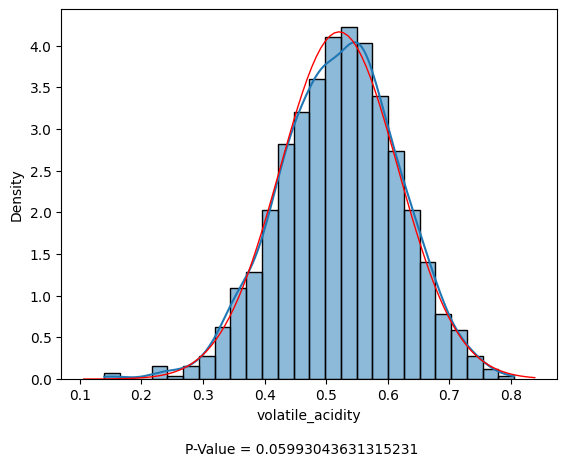

In [21]:
show_histplot(list(df)[1])

Pada kurva/plot histogram, terlihat bahwa: 
+ kurva relatif simetrik
+ hanya ada satu peak pada kurva/ kurva bersifat unimodal
+ kurva relatif melandai dengan mulus tanpa ada *peak* 
+ kurva relatif menyerupai *bells curve* referensi (garis merah) 

Keempat deskripsi tersebut mengindikasikan kurva normal maka berdasarkan visualisasi histogram dapat disimpulkan bahwa data pada kolom volatile acidity **terdistribusi secara normal**.

Selanjutnya, dengan  *Shapiro-Wilk test* akan diuji apakah kurva tersebut merupakan kurva normal atau bukan. Berdasarkan *Shapiro-Wilk test* diperoleh nilai p-value sebesar 0.059 yang lebih besar dari *threshold* yaitu 0.05. Maka berdasarkan *Shapiro-Wilk test* **tidak dapat dibuktikan** bahwa kurva tersebut **tidak** terdistribusi secara normal. Hal ini mendukung pernyataan kesimpulan sebelumnya bahwa data pada kolom volatile acidity **terdistribusi secara normal**.

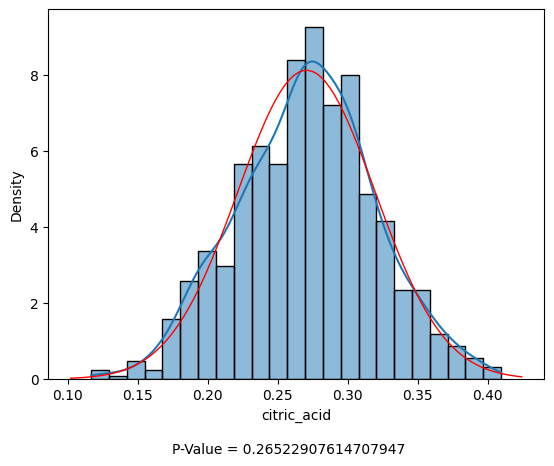

In [22]:
show_histplot(list(df)[2])

Pada kurva/plot histogram, terlihat bahwa: 
+ kurva relatif simetrik
+ hanya ada satu peak pada kurva/ kurva bersifat unimodal
+ kurva relatif melandai dengan mulus tanpa ada *peak* 
+ kurva relatif menyerupai *bells curve* referensi (garis merah) 

Keempat deskripsi tersebut mengindikasikan kurva normal maka berdasarkan visualisasi histogram dapat disimpulkan bahwa data pada kolom citric acid **terdistribusi secara normal**.

Selanjutnya, dengan  *Shapiro-Wilk test* akan diuji apakah kurva tersebut merupakan kurva normal atau bukan. Berdasarkan *Shapiro-Wilk test* diperoleh nilai p-value sebesar 0.265 yang lebih besar dari *threshold* yaitu 0.05. Maka berdasarkan *Shapiro-Wilk test* **tidak dapat dibuktikan** bahwa kurva tersebut **tidak** terdistribusi secara normal. Hal ini mendukung pernyataan kesimpulan sebelumnya bahwa data pada kolom citric acid **terdistribusi secara normal**.

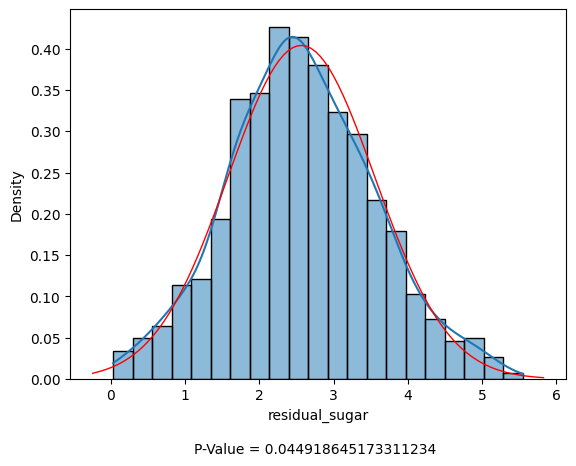

In [23]:
show_histplot(list(df)[3])

Pada kurva/plot histogram, terlihat bahwa: 
+ kurva condong ke kiri
+ hanya ada satu peak pada kurva/ kurva bersifat unimodal
+ kurva tidak melandai dengan mulus
+ kurva lebih kurus, lebih lancip, dan lebih condong ke kiri dari *bells curve* referensi (garis merah) 

Keempat deskripsi tersebut tidak mengindikasikan kurva normal maka berdasarkan visualisasi histogram dapat disimpulkan bahwa data pada kolom residual sugar ** tidak terdistribusi secara normal**.

Selanjutnya, dengan  *Shapiro-Wilk test* akan diuji apakah kurva tersebut merupakan kurva normal atau bukan. Berdasarkan *Shapiro-Wilk test* diperoleh nilai p-value sebesar 0.045 yang lebih kecil dari *threshold* yaitu 0.05. Maka berdasarkan *Shapiro-Wilk test* **dapat dibuktikan** bahwa kurva tersebut **tidak** terdistribusi secara normal. Hal ini mendukung pernyataan kesimpulan sebelumnya bahwa data pada kolom residual sugar **tidak terdistribusi secara normal**.

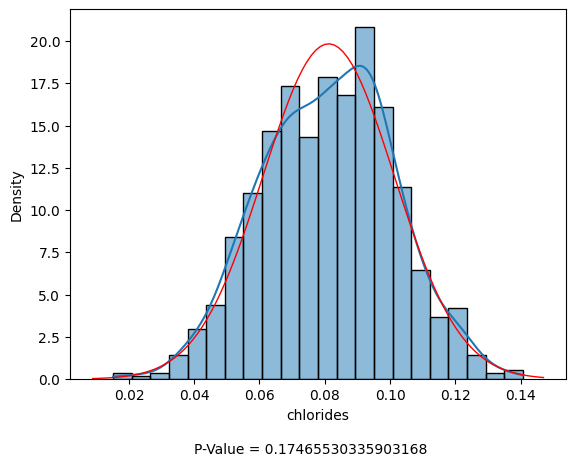

In [24]:
show_histplot(list(df)[4])

Pada kurva/plot histogram, terlihat bahwa: 
+ kurva relatif simetrik
+ hanya ada satu peak pada kurva/ kurva bersifat unimodal
+ kurva relatif melandai dengan mulus tanpa ada *peak* 
+ kurva relatif menyerupai *bells curve* referensi (garis merah) 

Keempat deskripsi tersebut mengindikasikan kurva normal maka berdasarkan visualisasi histogram dapat disimpulkan bahwa data pada kolom chlorides **terdistribusi secara normal**.

Selanjutnya, dengan  *Shapiro-Wilk test* akan diuji apakah kurva tersebut merupakan kurva normal atau bukan. Berdasarkan *Shapiro-Wilk test* diperoleh nilai p-value sebesar 0.174 yang lebih besar dari *threshold* yaitu 0.05. Maka berdasarkan *Shapiro-Wilk test* **tidak dapat dibuktikan** bahwa kurva tersebut **tidak** terdistribusi secara normal. Hal ini mendukung pernyataan kesimpulan sebelumnya bahwa data pada kolom chlorides **terdistribusi secara normal**.

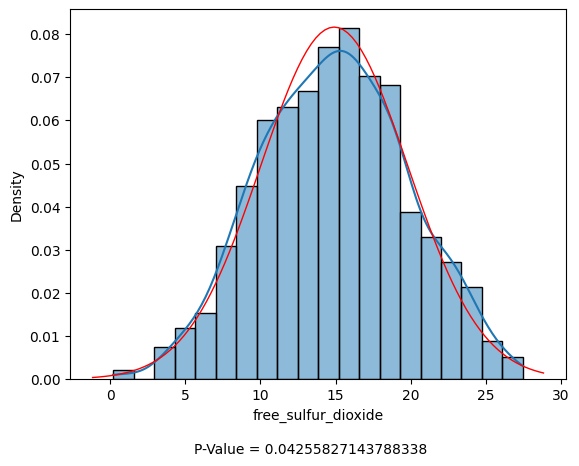

In [25]:
show_histplot(list(df)[5])

Pada kurva/plot histogram, terlihat bahwa: 
+ kurva relatif simetrik
+ hanya ada satu peak pada kurva/ kurva bersifat unimodal
+ kurva tidak melandai dengan mulus
+ kurva lebih gemuk, lebih tumpul, dari *bells curve* referensi (garis merah) 

Keempat deskripsi tersebut tidak mengindikasikan kurva normal maka berdasarkan visualisasi histogram dapat disimpulkan bahwa data pada kolom free sulfur dioxide** tidak terdistribusi secara normal**.

Selanjutnya, dengan  *Shapiro-Wilk test* akan diuji apakah kurva tersebut merupakan kurva normal atau bukan. Berdasarkan *Shapiro-Wilk test* diperoleh nilai p-value sebesar 0.043 yang lebih kecil dari *threshold* yaitu 0.05. Maka berdasarkan *Shapiro-Wilk test* **dapat dibuktikan** bahwa kurva tersebut **tidak** terdistribusi secara normal. Hal ini mendukung pernyataan kesimpulan sebelumnya bahwa data pada kolom free sulfur dioxide **tidak terdistribusi secara normal**.

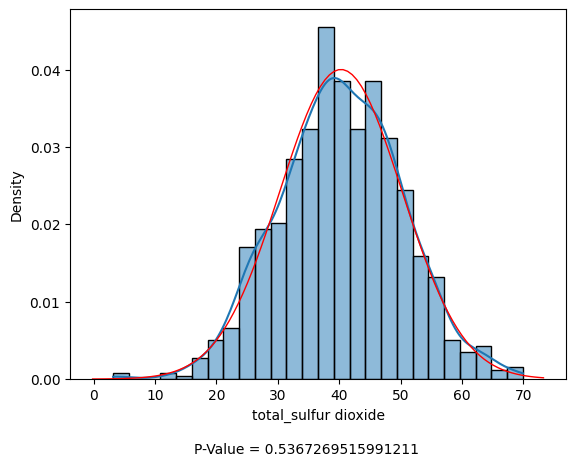

In [26]:
show_histplot(list(df)[6])

Pada kurva/plot histogram, terlihat bahwa: 
+ kurva relatif simetrik
+ hanya ada satu peak pada kurva/ kurva bersifat unimodal
+ kurva relatif melandai dengan mulus tanpa ada *peak* 
+ kurva relatif menyerupai *bells curve* referensi (garis merah) 

Keempat deskripsi tersebut mengindikasikan kurva normal maka berdasarkan visualisasi histogram dapat disimpulkan bahwa data pada kolom total_sulfur dioxide **terdistribusi secara normal**.

Selanjutnya, dengan  *Shapiro-Wilk test* akan diuji apakah kurva tersebut merupakan kurva normal atau bukan. Berdasarkan *Shapiro-Wilk test* diperoleh nilai p-value sebesar 0.537 yang lebih besar dari *threshold* yaitu 0.05. Maka berdasarkan *Shapiro-Wilk test* **tidak dapat dibuktikan** bahwa kurva tersebut **tidak** terdistribusi secara normal. Hal ini mendukung pernyataan kesimpulan sebelumnya bahwa data pada kolom total_sulfur dioxide **terdistribusi secara normal**.

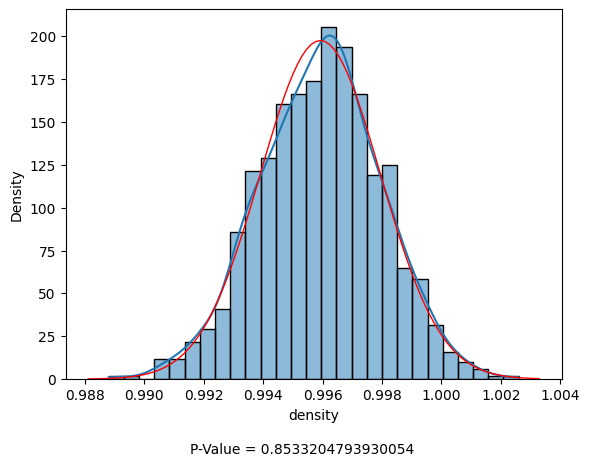

In [27]:
show_histplot(list(df)[7])

Pada kurva/plot histogram, terlihat bahwa: 
+ kurva relatif simetrik
+ hanya ada satu peak pada kurva/ kurva bersifat unimodal
+ kurva relatif melandai dengan mulus tanpa ada *peak* 
+ kurva relatif menyerupai *bells curve* referensi (garis merah) 

Keempat deskripsi tersebut mengindikasikan kurva normal maka berdasarkan visualisasi histogram dapat disimpulkan bahwa data pada kolom density **terdistribusi secara normal**.

Selanjutnya, dengan  *Shapiro-Wilk test* akan diuji apakah kurva tersebut merupakan kurva normal atau bukan. Berdasarkan *Shapiro-Wilk test* diperoleh nilai p-value sebesar 0.853 yang lebih besar dari *threshold* yaitu 0.05. Maka berdasarkan *Shapiro-Wilk test* **tidak dapat dibuktikan** bahwa kurva tersebut **tidak** terdistribusi secara normal. Hal ini mendukung pernyataan kesimpulan sebelumnya bahwa data pada kolom density **terdistribusi secara normal**.

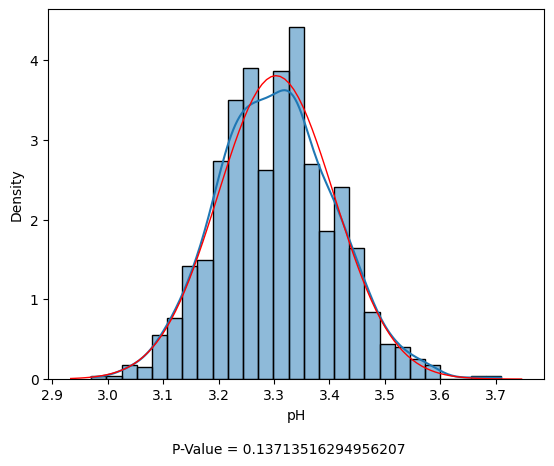

In [28]:
show_histplot(list(df)[8])

Pada kurva/plot histogram, terlihat bahwa: 
+ kurva relatif simetrik
+ hanya ada satu peak pada kurva/ kurva bersifat unimodal
+ kurva relatif melandai dengan mulus tanpa ada *peak* 
+ kurva relatif menyerupai *bells curve* referensi (garis merah) 

Keempat deskripsi tersebut mengindikasikan kurva normal maka berdasarkan visualisasi histogram dapat disimpulkan bahwa data pada kolom pH **terdistribusi secara normal**.

Selanjutnya, dengan  *Shapiro-Wilk test* akan diuji apakah kurva tersebut merupakan kurva normal atau bukan. Berdasarkan *Shapiro-Wilk test* diperoleh nilai p-value sebesar 0.137 yang lebih besar dari *threshold* yaitu 0.05. Maka berdasarkan *Shapiro-Wilk test* **tidak dapat dibuktikan** bahwa kurva tersebut **tidak** terdistribusi secara normal. Hal ini mendukung pernyataan kesimpulan sebelumnya bahwa data pada kolom pH **terdistribusi secara normal**.

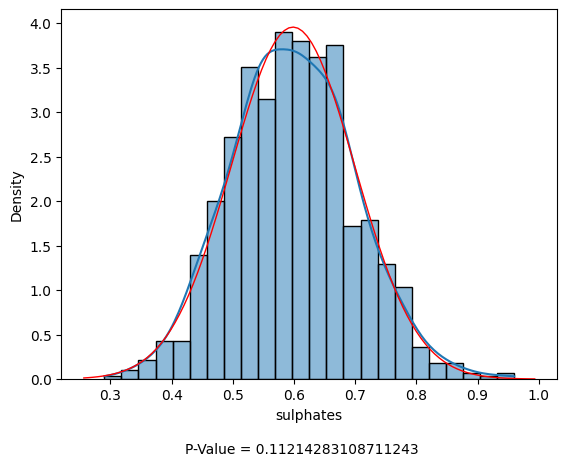

In [29]:
show_histplot(list(df)[9])

Pada kurva/plot histogram, terlihat bahwa: 
+ kurva relatif simetrik
+ hanya ada satu peak pada kurva/ kurva bersifat unimodal
+ kurva relatif melandai dengan mulus tanpa ada *peak* 
+ kurva relatif menyerupai *bells curve* referensi (garis merah) 

Keempat deskripsi tersebut mengindikasikan kurva normal maka berdasarkan visualisasi histogram dapat disimpulkan bahwa data pada kolom sulphates **terdistribusi secara normal**.

Selanjutnya, dengan  *Shapiro-Wilk test* akan diuji apakah kurva tersebut merupakan kurva normal atau bukan. Berdasarkan *Shapiro-Wilk test* diperoleh nilai p-value sebesar 0.112 yang lebih besar dari *threshold* yaitu 0.05. Maka berdasarkan *Shapiro-Wilk test* **tidak dapat dibuktikan** bahwa kurva tersebut **tidak** terdistribusi secara normal. Hal ini mendukung pernyataan kesimpulan sebelumnya bahwa data pada kolom sulphates **terdistribusi secara normal**.

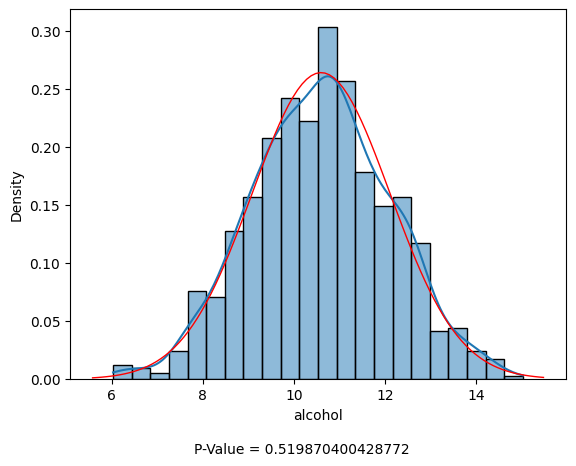

In [30]:
show_histplot(list(df)[10])

Pada kurva/plot histogram, terlihat bahwa: 
+ kurva relatif simetrik
+ hanya ada satu peak pada kurva/ kurva bersifat unimodal
+ kurva relatif melandai dengan mulus tanpa ada *peak* 
+ kurva relatif menyerupai *bells curve* referensi (garis merah) 

Keempat deskripsi tersebut mengindikasikan kurva normal maka berdasarkan visualisasi histogram dapat disimpulkan bahwa data pada kolom alcohol **terdistribusi secara normal**.

Selanjutnya, dengan  *Shapiro-Wilk test* akan diuji apakah kurva tersebut merupakan kurva normal atau bukan. Berdasarkan *Shapiro-Wilk test* diperoleh nilai p-value sebesar 0.51937 yang lebih besar dari *threshold* yaitu 0.05. Maka berdasarkan *Shapiro-Wilk test* **tidak dapat dibuktikan** bahwa kurva tersebut **tidak** terdistribusi secara normal. Hal ini mendukung pernyataan kesimpulan sebelumnya bahwa data pada kolom alcohol **terdistribusi secara normal**.

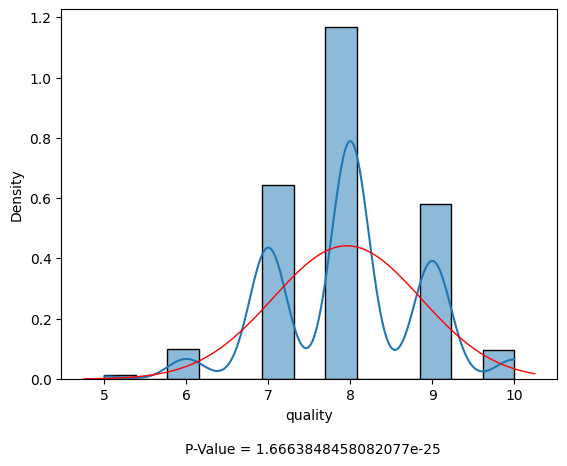

In [31]:
show_histplot(list(df)[11])

Pada kurva/plot histogram, terlihat bahwa: 
+ kurva relatif simetrik
+ terdapat tiga peak pada kurva/ kurva bersifat trimodal
+ kurva tidak melandai dengan mulus
+ kurva berbeda jauh dari *bells curve* referensi (garis merah) 

Keempat deskripsi tersebut tidak mengindikasikan kurva normal maka berdasarkan visualisasi histogram dapat disimpulkan bahwa data pada kolom quality **tidak terdistribusi secara normal**.

Selanjutnya, dengan  *Shapiro-Wilk test* akan diuji apakah kurva tersebut merupakan kurva normal atau bukan. Berdasarkan *Shapiro-Wilk test* diperoleh nilai p-value sebesar 0.000 yang lebih kecil dari *threshold* yaitu 0.05. Maka berdasarkan *Shapiro-Wilk test* **dapat dibuktikan** bahwa kurva tersebut **tidak** terdistribusi secara normal. Hal ini mendukung pernyataan kesimpulan sebelumnya bahwa data pada kolom quality **tidak terdistribusi secara normal**.

#### Nomor 4
Melakukan test hipotesis 1 sampel,
+ Nilai rata-rata pH di atas 3.29?
+ Nilai rata-rata Residual Sugar tidak sama dengan 2.50?
+ Nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?
+ Nilai rata-rata total sulfur dioxide di bawah 35?
+ Proporsi nilai total sulfur dioxide yang lebih dari 40, adalah tidak sama dengan 50% ?

In [36]:
markdown("## Data Kualitas Untuk Soal No 4 dan 5")
display(df)

## Data Kualitas Untuk Soal No 4 dan 5

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.90,0.4451,0.1813,2.049401,0.070574,16.593818,42.27,0.9982,3.27,0.71,8.64,7
1,8.40,0.5768,0.2099,3.109590,0.101681,22.555519,16.01,0.9960,3.35,0.57,10.03,8
2,7.54,0.5918,0.3248,3.673744,0.072416,9.316866,35.52,0.9990,3.31,0.64,9.23,8
3,5.39,0.4201,0.3131,3.371815,0.072755,18.212300,41.97,0.9945,3.34,0.55,14.07,9
4,6.51,0.5675,0.1940,4.404723,0.066379,9.360591,46.27,0.9925,3.27,0.45,11.49,8
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.96,0.6046,0.2662,1.592048,0.057555,14.892445,44.61,0.9975,3.35,0.54,10.41,8
996,8.48,0.4080,0.2227,0.681955,0.051627,23.548965,25.83,0.9972,3.41,0.46,9.91,8
997,6.11,0.4841,0.3720,2.377267,0.042806,21.624585,48.75,0.9928,3.23,0.55,9.94,7
998,7.76,0.3590,0.3208,4.294486,0.098276,12.746186,44.53,0.9952,3.30,0.66,9.76,8


#### Nomor 4.a. Nilai rata-rata pH diatas 3.29? 
Tentukan **H0** dan **H1** yang didapat:
+ **H0** :  $ \mu = 3.29 $
+ **H1** :  $ \mu > 3.29 $

Karena hipotesis alternatif hanya mempertimbangkan $\mu$ dari satu sisi garis bilangan, maka dilakukan one-tailed test.

Definisikan daerah kritis yang adalah $\alpha = 0.05$

Kalkulasi nilai Z untuk alpha ($\alpha$):

In [46]:
zAlpha = norm.ppf(1-0.05)
markdown(f"Daerah kritis $\\alpha$ didapatkan {zAlpha:.3f}")

Daerah kritis $\alpha$ didapatkan 1.645

Selanjutnya, karena testing hipotesis rata-rata dan jumlah populasi yang berukuran besar, dilakukan z-test untuk menguji hipotesis tersebut. Dengan rumus sebagai berikut.

$z = (\bar{x}$ - $\mu$<sub>0</sub>) / ($\sigma$ / $\sqrt{n})$


In [74]:
def hitungZ(hipotesis, dataKolom):
    ret = (np.mean(dataKolom)-hipotesis)/(np.std(dataKolom)/np.sqrt(len(dataKolom)))
    return ret

testRes = hitungZ(3.29, df['pH'])
nilaiP = norm.sf(testRes)

markdown(f"Maka, didapatkan hasil:")
markdown(f" - Nilai uji Z = {testRes:.3f} ")
markdown(f" - P-value = {nilaiP}")

Maka, didapatkan hasil:

 - Nilai uji Z = 4.106 

 - P-value = 2.0142916469886452e-05

Jika dibandingkan, nilai uji z yang didapat dengan z alpha adalah $4.106>1.645$. Berdasarkan hal tersebut hipotesis **H0** ditolak. Pernyataan tersebut didukung oleh hasil P-value yang lebih kecil dari nilai $\alpha$.

Maka, hipotesis **H0** **ditolak** sehingga rata-rata pH adalah diatas 3.29

#### Nomor 4.b. Nilai rata-rata Residual Sugar tidak sama dengan 2.50?

Tentukan hipotesis awal dan alternatif.
+ **H0**: $\mu = 2.5$
+ **H1**: $\mu \ne 2.5$

Hipotesis alternatif mempertimbangkan nilai dari kedua sisi garis bilangan, sehingga akan digunakan **two-tailed test**.

Definisikan daerah kritis $\alpha=0.05$ sehingga untuk sisi kanan dan sisi kiri $\alpha = \alpha/2 = 0.025$

In [82]:
zAlphaKanan = norm.ppf(1-0.025)
zAlphaKiri = norm.ppf(0.025)

markdown(f'Nilai Z kanan dan kiri sebagai batas daerah kritis adalah ${zAlphaKiri:.3f}<z<{zAlphaKanan:.3f}$')

Nilai Z kanan dan kiri sebagai batas daerah kritis adalah $-1.960<z<1.960$

Rumus z-test yang digunakan pada soal 4.a. digunakan kembali pada persoalan ini.

In [81]:
testRes = hitungZ(2.5, df['residual_sugar'])
nilaiP = 2 * (norm.sf(testRes))

markdown(f"Maka, didapatkan hasil:")
markdown(f" - Nilai uji Z = {testRes:.3f} ")
markdown(f" - P-value = {nilaiP:.3f}")

Maka, didapatkan hasil:

 - Nilai uji Z = 2.149 

 - P-value = 0.032

Nilai uji z yang dihasilkan diatas tidak berada dalam daerah kritis yang sudah didefinisikan sebelumnya ($-1.960<z<1.960$) dan juga p-value lebih kecil dari $\alpha$ ($0.032<0.05$).

Sehingga, hipotesis **H0 ditolak** dan rata-rata residual sugar tidak sama dengan 2.50.

#### Nomor 4.c. Nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?

Data yang digunakan hanyalah 150 baris pertama dari kolom sulphates yang adalah:

In [83]:
data = df['sulphates'].head(150)
display(data)

0      0.71
1      0.57
2      0.64
3      0.55
4      0.45
       ... 
145    0.73
146    0.79
147    0.73
148    0.63
149    0.60
Name: sulphates, Length: 150, dtype: float64

Tentukan hipotesis awal dan alternatif:
+ **H0**: $\mu = 0.65$
+ **H1**: $\mu \ne 0.65$

Seperti soal sebelumnya, hipotesis alternatif mempertimbangkan nilai dari kedua sisi garis bilangan sehingga akan digunakan **two-tailed test** juga dengan uji test yang sama pula.

Definisikan daerah kritis $\alpha=0.05$ sehingga untuk sisi kanan dan sisi kiri $\alpha = \alpha/2 = 0.025$

In [86]:
zAlphaKanan = norm.ppf(1-0.025)
zAlphaKiri = norm.ppf(0.025)

markdown(f'Nilai Z kanan dan kiri sebagai batas daerah kritis adalah ${zAlphaKiri:.3f}<z<{zAlphaKanan:.3f}$')

testRes = hitungZ(0.65, data)
nilaiP = 2 * (norm.sf(testRes))

markdown(f"Maka, didapatkan hasil:")
markdown(f" - Nilai uji Z = {testRes:.3f} ")
markdown(f" - P-value = {nilaiP:.3f}")


Nilai Z kanan dan kiri sebagai batas daerah kritis adalah $-1.960<z<1.960$

Maka, didapatkan hasil:

 - Nilai uji Z = 0.662 

 - P-value = 0.508

#### Nomor 5
Melakukan test hipotesis 2 sampel,
+ Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom.
Benarkah rata-rata kedua bagian tersebut sama?
+ Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah
rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?
+ Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan
rata-rata 25 baris pertama kolom Sulphates ?
+ Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?
+ Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?

Referensi

```
https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm#:~:text=Skewness%20is%20a%20measure%20of,relative%20to%20a%20normal%20distribution.
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3693611/
```
